In [1]:
from models.annealed_vae import AnnealedVAE
from models.info_vae import InfoVAE
from models.beta_tcvae import BetaTCVAE
from architectures.SimpleConv56 import *
from architectures.Conv56 import *

In [2]:
z_dim = 10
num_channels = 
image_size = 56

In [3]:
# vae = AnnealedVAE(SimpleGaussianConv56(z_dim, num_channels, image_size), SimpleConv56Decoder(z_dim, num_channels, image_size), beta=50.0, max_c=20, iterations_c=75)
vae = AnnealedVAE(GaussianConv56(z_dim, num_channels, image_size), Conv56Decoder(z_dim, num_channels, image_size), gamma=50.0, max_c=20, iterations_c=75)
# vae = InfoVAE(SimpleGaussianConv56(z_dim, num_channels, image_size), SimpleConv56Decoder(z_dim, num_channels, image_size), alpha=0.0, lambd=100.0)
# vae = BetaTCVAE(SimpleGaussianConv56(z_dim, num_channels, image_size), SimpleConv56Decoder(z_dim, num_channels, image_size), beta=10.0)
# vae.initOptimizer(lr=1e-5)


cuda


In [4]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
])
ds = ImageFolder("./data/splits/", transform=transform)

In [5]:
def display_image(image):
    display(image, metadata={'width': '100%'})

In [6]:
import matplotlib.pyplot as plt
import numpy as np

stats = {
    'losses': [[0,0]],
    'eval_losses': [],
    'eval_scores': []
}

def addLoss(losses):
    stats['losses'] = losses

def addEval(eval_losses, eval_scores, eval_step = 10):
    stats['eval_losses'] = eval_losses
    stats['eval_scores'] = eval_scores

    fig, axs = plt.subplots(2, 3, figsize=(20,15))
    data = np.array(stats['losses'])
    eval_data = np.array(eval_losses)
    axs[0, 0].plot(range(len(data)), data[:,1], label='train recon loss')
    axs[0, 0].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,1], label='test recon loss')
    axs[0, 0].legend()

    axs[0, 1].plot(range(len(data)), data[:,2], label='train kl loss')
    axs[0, 1].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,2], label='test kl loss')
    axs[0, 1].legend()

    axs[0, 2].plot(range(len(data)), data[:,0], label='train loss')
    axs[0, 2].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,0], label='test loss')
    axs[0, 2].legend()

    score_data = np.array(eval_scores)
    axs[1, 0].plot(score_data[:,0], label='beta-vae-score train')
    axs[1, 0].plot(score_data[:,1], label='beta-vae-score test')
    axs[1, 0].legend()

    # axs[1, 2].plot(range(len(data)), data[:,3], label='train tc loss')
    # axs[1, 2].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,3], label='test tc loss')
    # axs[1, 2].legend()


    plt.show()

  0%|          | 0/200 [00:08<?, ?it/s, epoch_stat=0, kl_loss=0.24, last_save=vae_0_2021-04-07_14-55-45_6515.554.save, reconstruction_loss=6.52e+3]

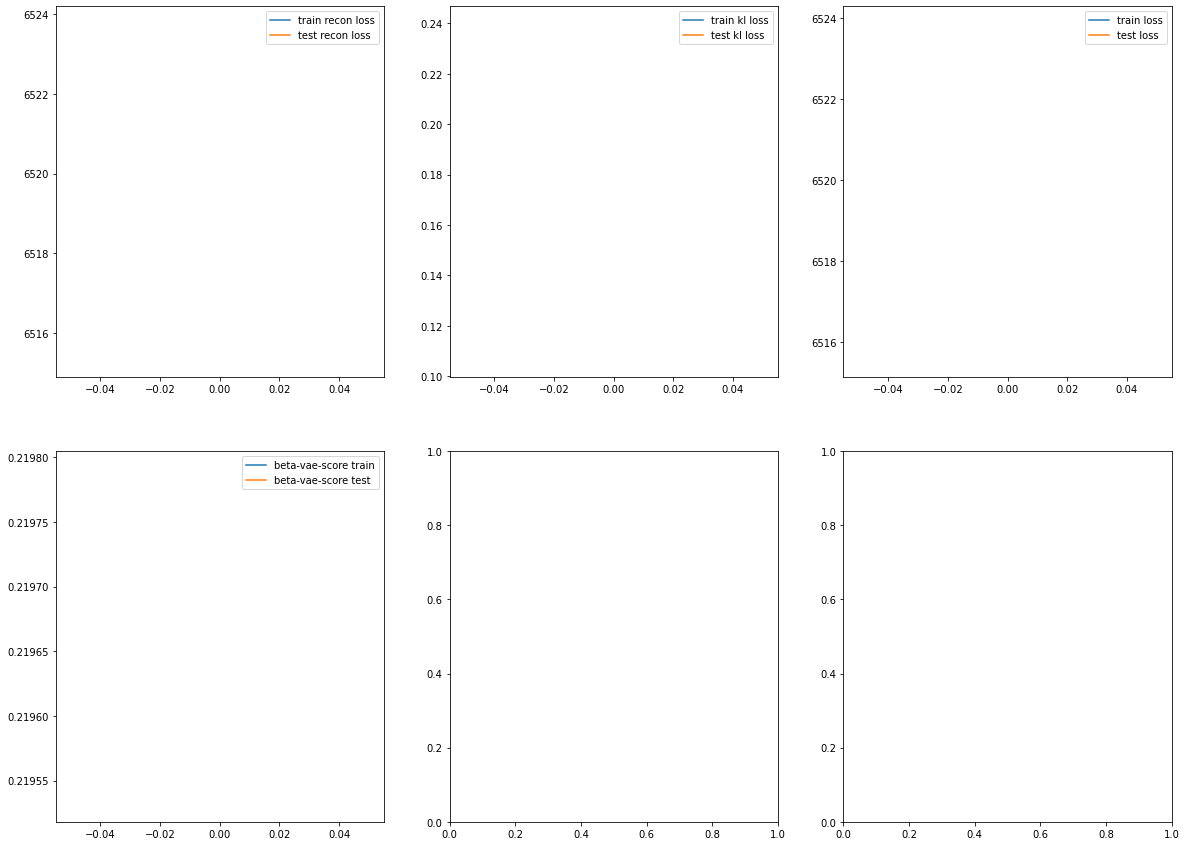

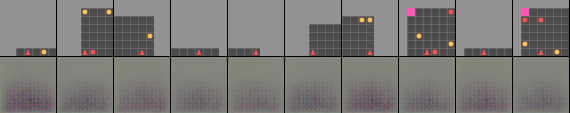

  5%|▌         | 10/200 [01:36<26:18,  8.31s/it, epoch_stat=10, kl_loss=4.99, last_save=vae_0_2021-04-07_14-55-45_6515.554.save, reconstruction_loss=6.32e+3]

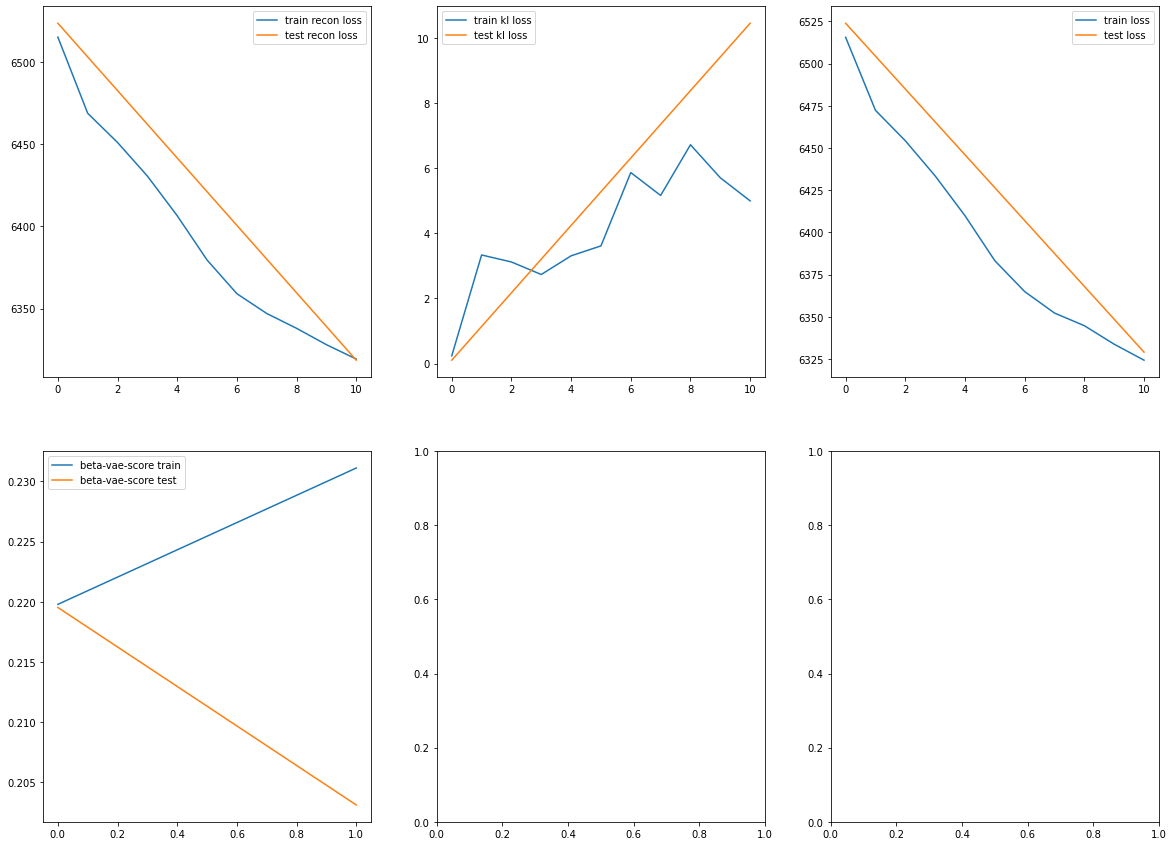

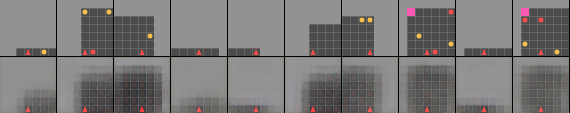

 10%|█         | 20/200 [03:02<24:19,  8.11s/it, epoch_stat=20, kl_loss=6.82, last_save=vae_20_2021-04-07_14-58-38_6272.0757.save, reconstruction_loss=6.27e+3]

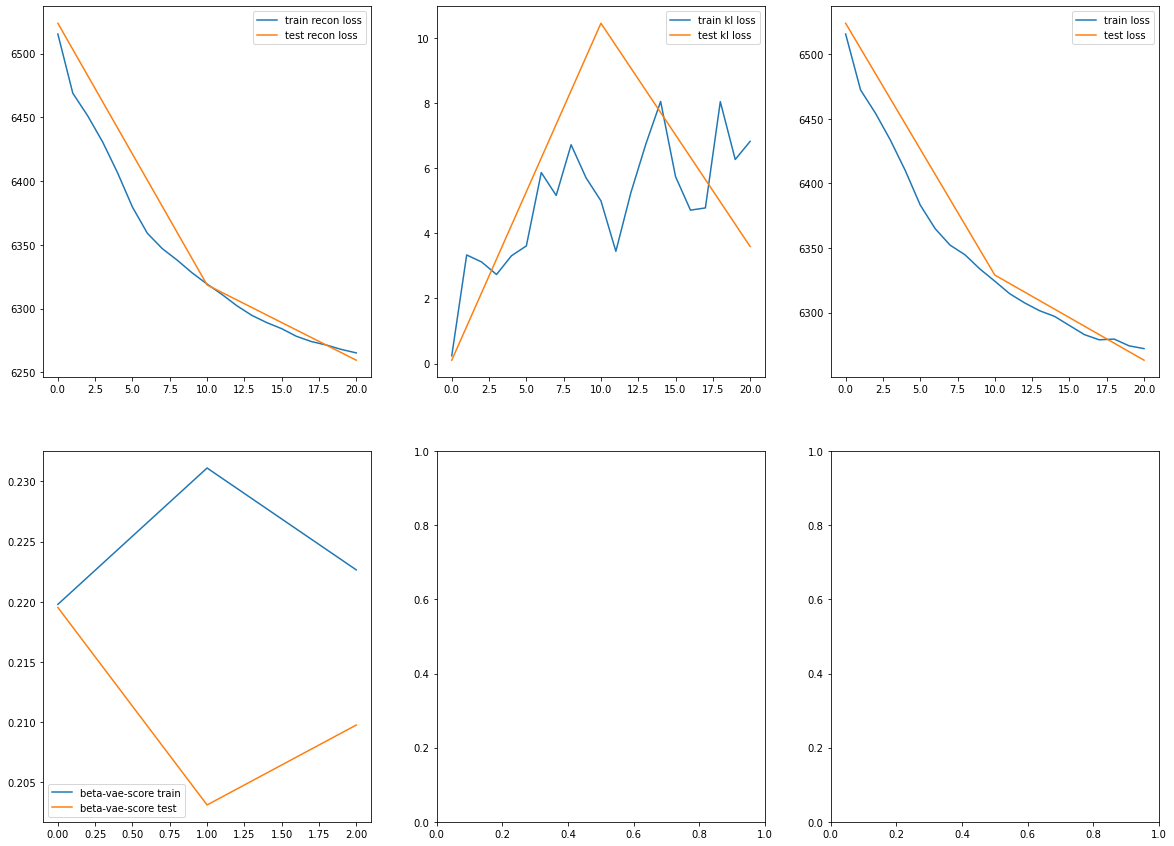

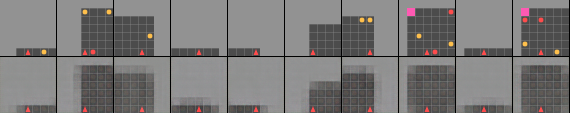

 15%|█▌        | 30/200 [04:28<23:07,  8.16s/it, epoch_stat=30, kl_loss=6.21, last_save=vae_20_2021-04-07_14-58-38_6272.0757.save, reconstruction_loss=6.25e+3]

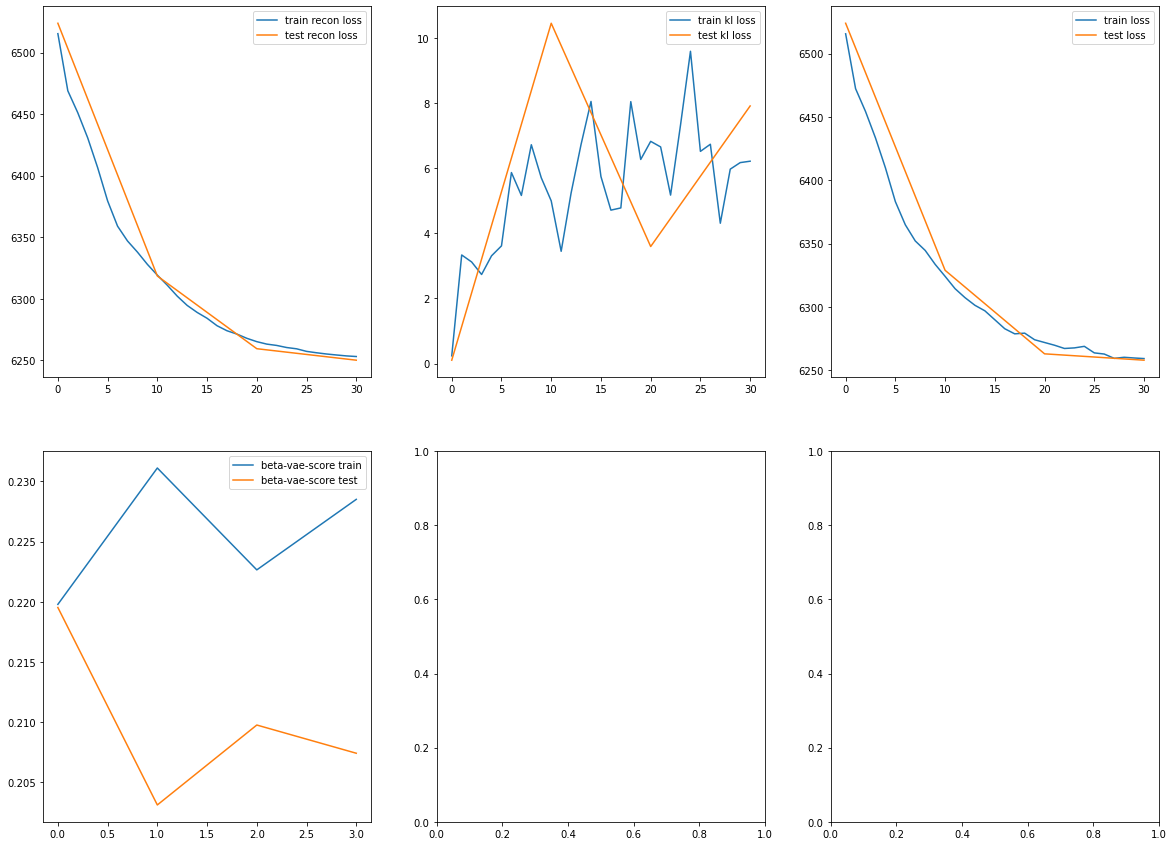

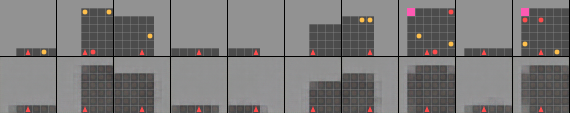

 20%|██        | 40/200 [05:55<21:36,  8.10s/it, epoch_stat=40, kl_loss=5.29, last_save=vae_40_2021-04-07_15-01-32_6253.447.save, reconstruction_loss=6.25e+3] 

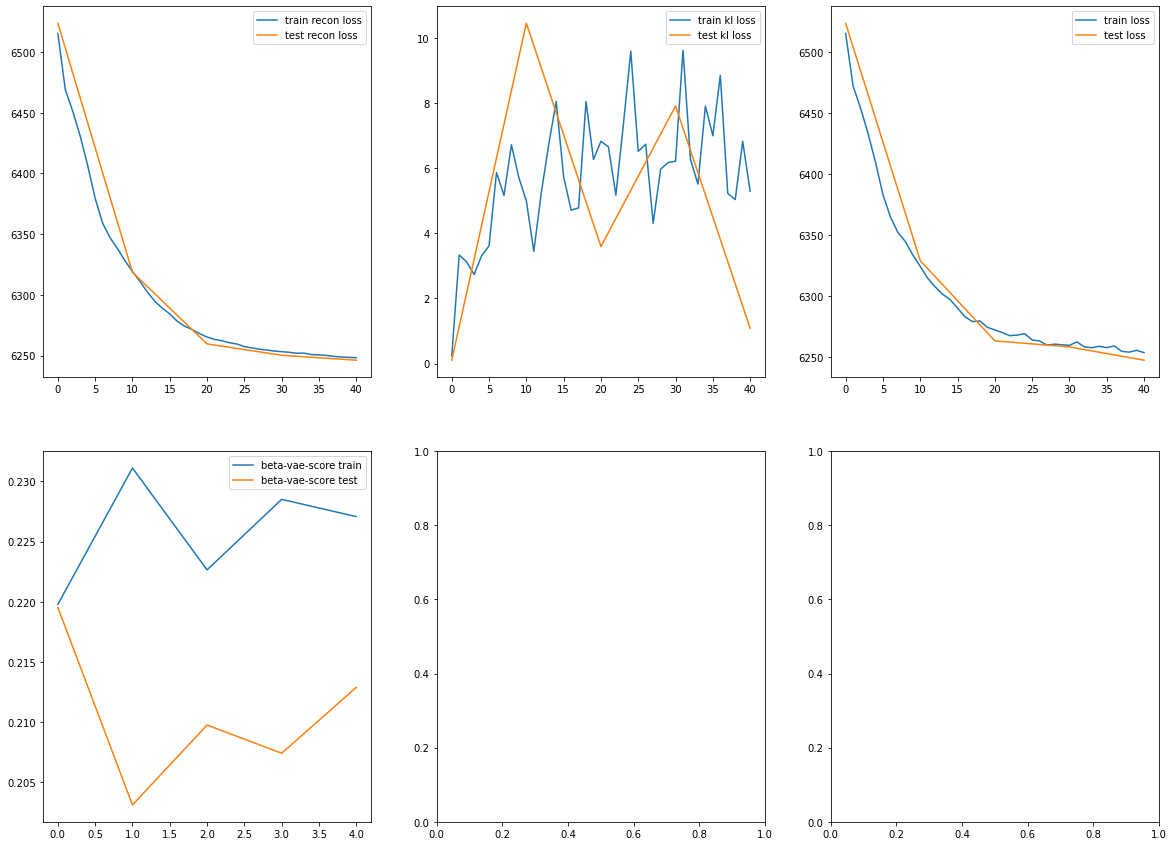

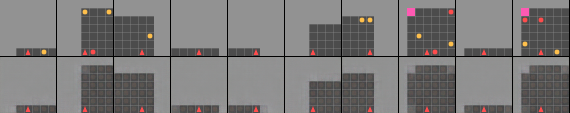

 25%|██▌       | 50/200 [07:23<20:40,  8.27s/it, epoch_stat=50, kl_loss=6.93, last_save=vae_40_2021-04-07_15-01-32_6253.447.save, reconstruction_loss=6.25e+3]

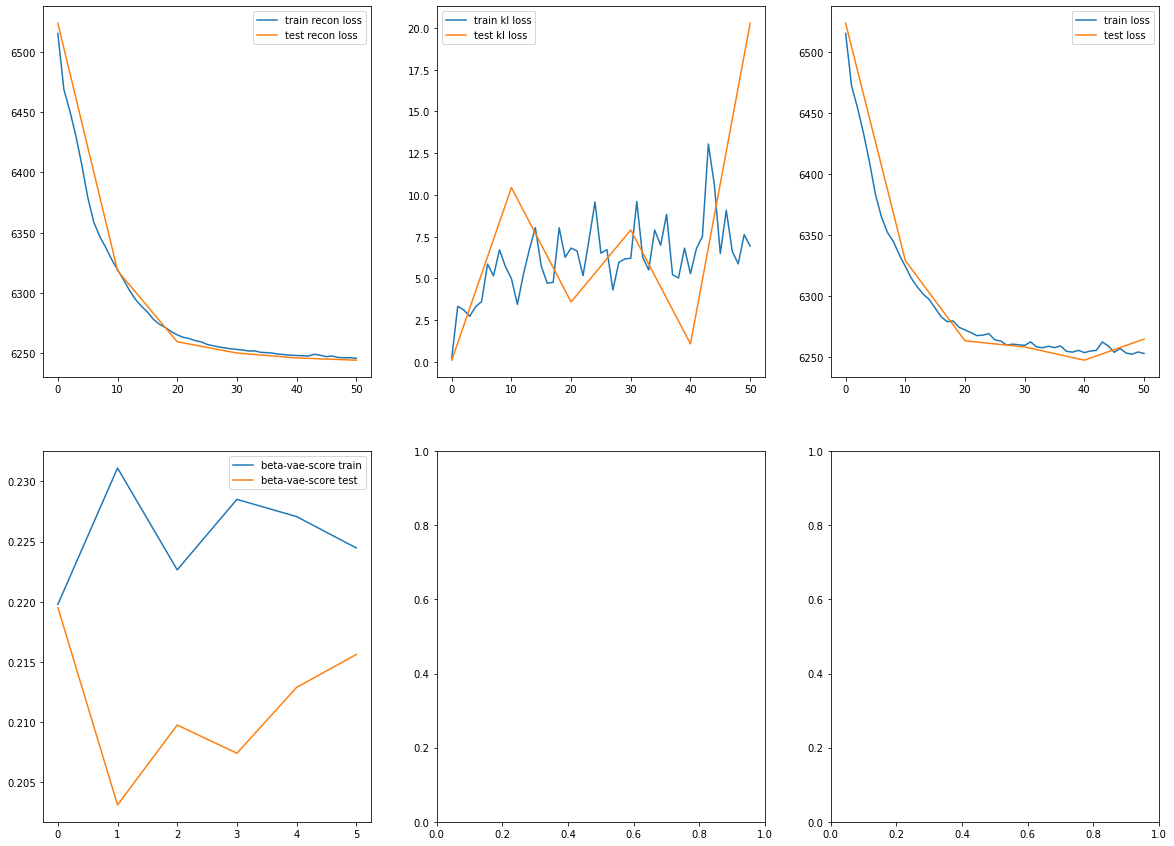

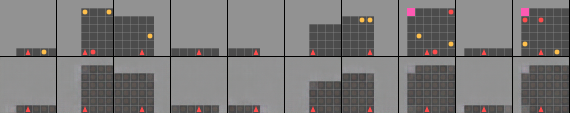

 30%|███       | 60/200 [08:49<18:55,  8.11s/it, epoch_stat=60, kl_loss=11.1, last_save=vae_60_2021-04-07_15-04-26_6255.634.save, reconstruction_loss=6.24e+3]

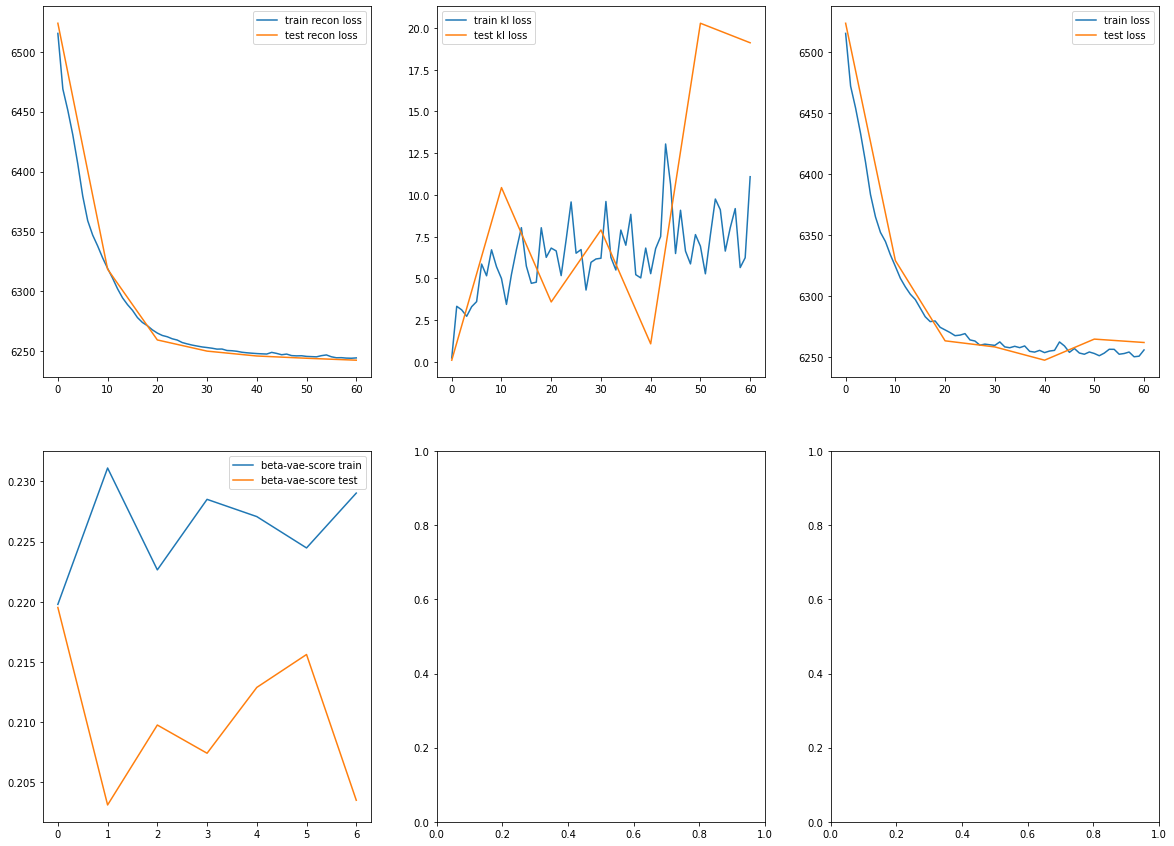

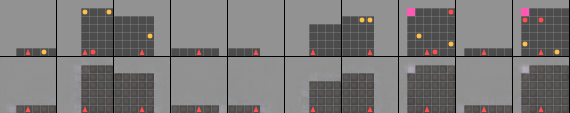

 35%|███▌      | 70/200 [10:15<17:32,  8.09s/it, epoch_stat=70, kl_loss=11.9, last_save=vae_60_2021-04-07_15-04-26_6255.634.save, reconstruction_loss=6243.07]

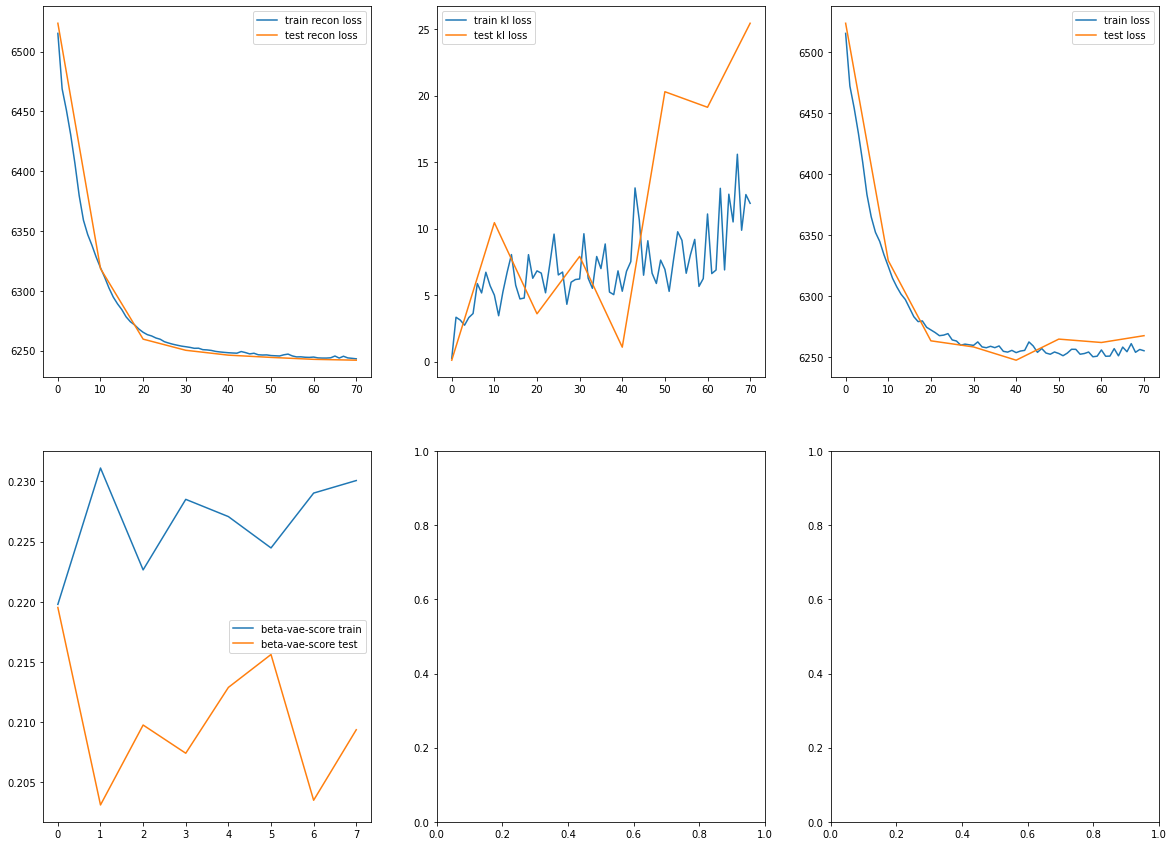

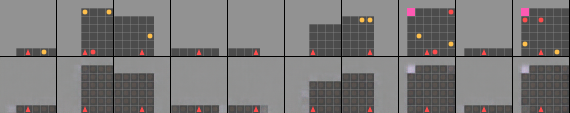

 40%|████      | 80/200 [11:41<16:12,  8.10s/it, epoch_stat=80, kl_loss=9.89, last_save=vae_80_2021-04-07_15-07-18_6252.7495.save, reconstruction_loss=6.24e+3]

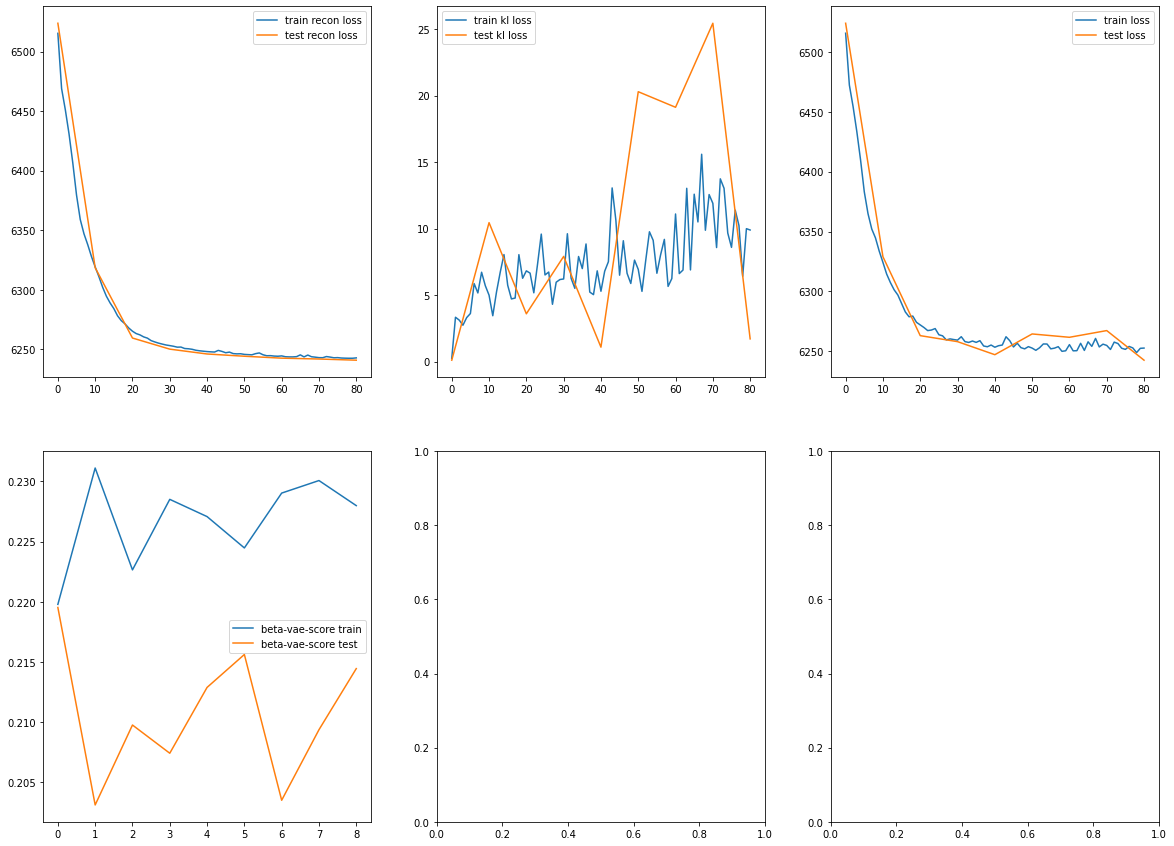

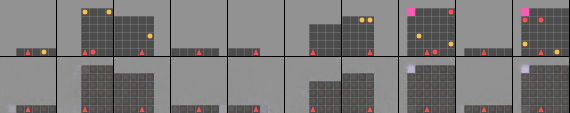

 45%|████▌     | 90/200 [13:07<14:47,  8.07s/it, epoch_stat=90, kl_loss=16, last_save=vae_80_2021-04-07_15-07-18_6252.7495.save, reconstruction_loss=6.24e+3]  

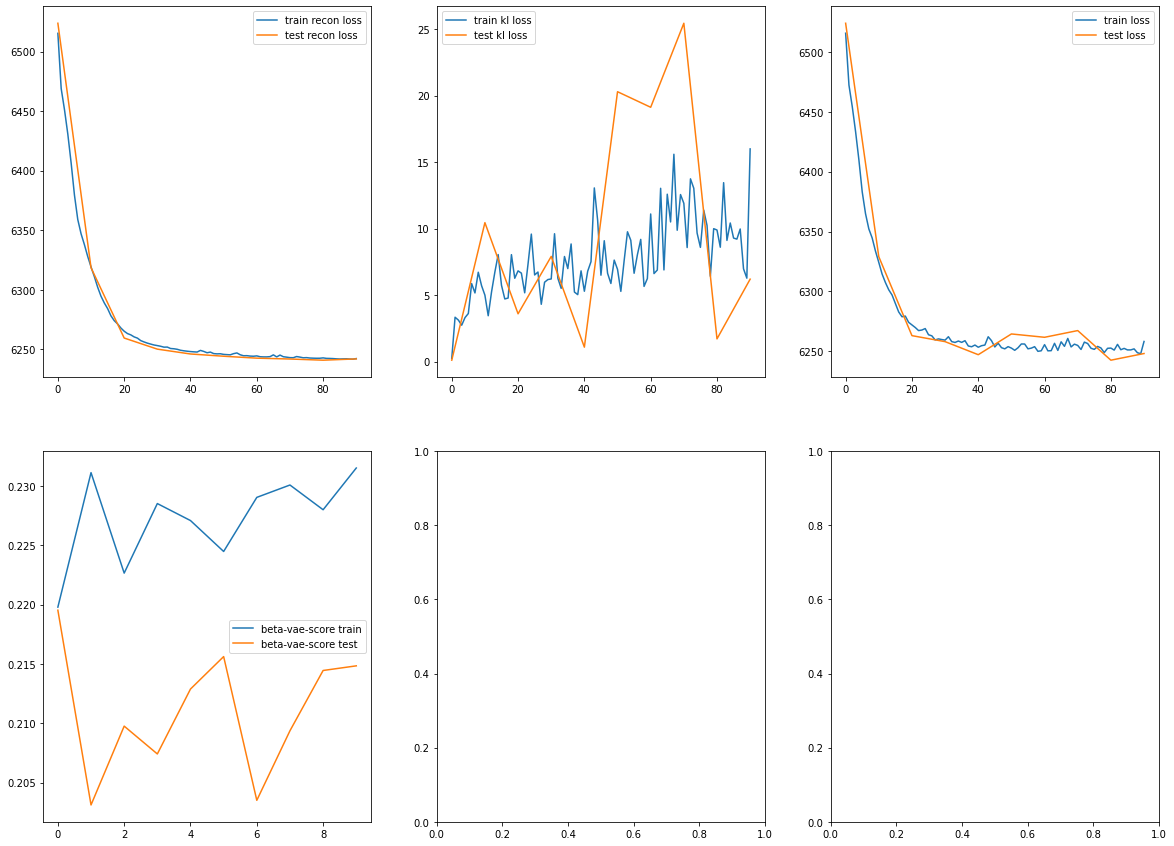

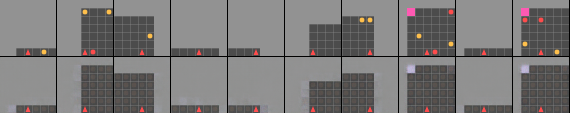

 50%|█████     | 100/200 [14:34<13:39,  8.19s/it, epoch_stat=100, kl_loss=10.4, last_save=vae_100_2021-04-07_15-10-10_6251.79.save, reconstruction_loss=6.24e+3]

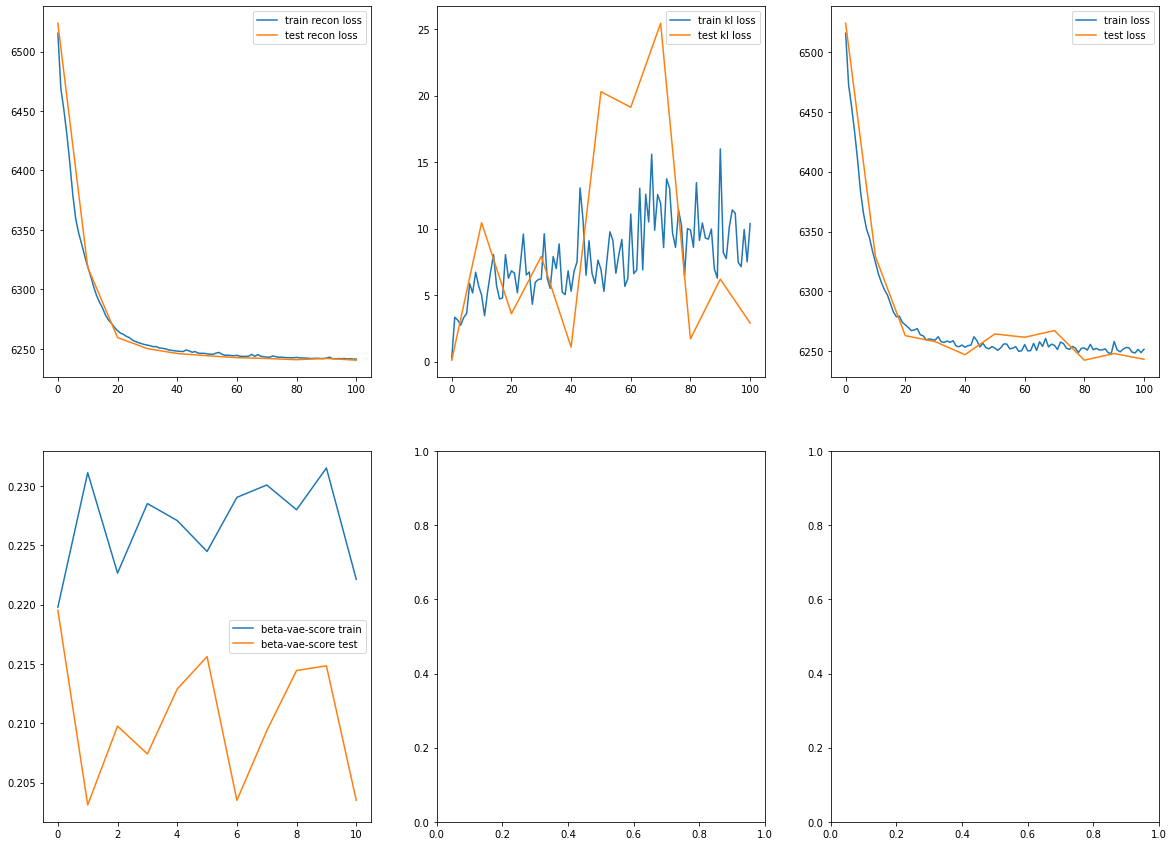

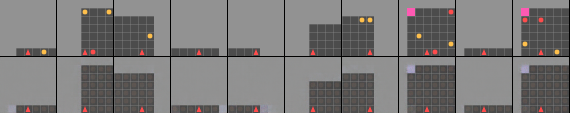

 55%|█████▌    | 110/200 [16:01<12:14,  8.16s/it, epoch_stat=110, kl_loss=11.7, last_save=vae_100_2021-04-07_15-10-10_6251.79.save, reconstruction_loss=6.24e+3]

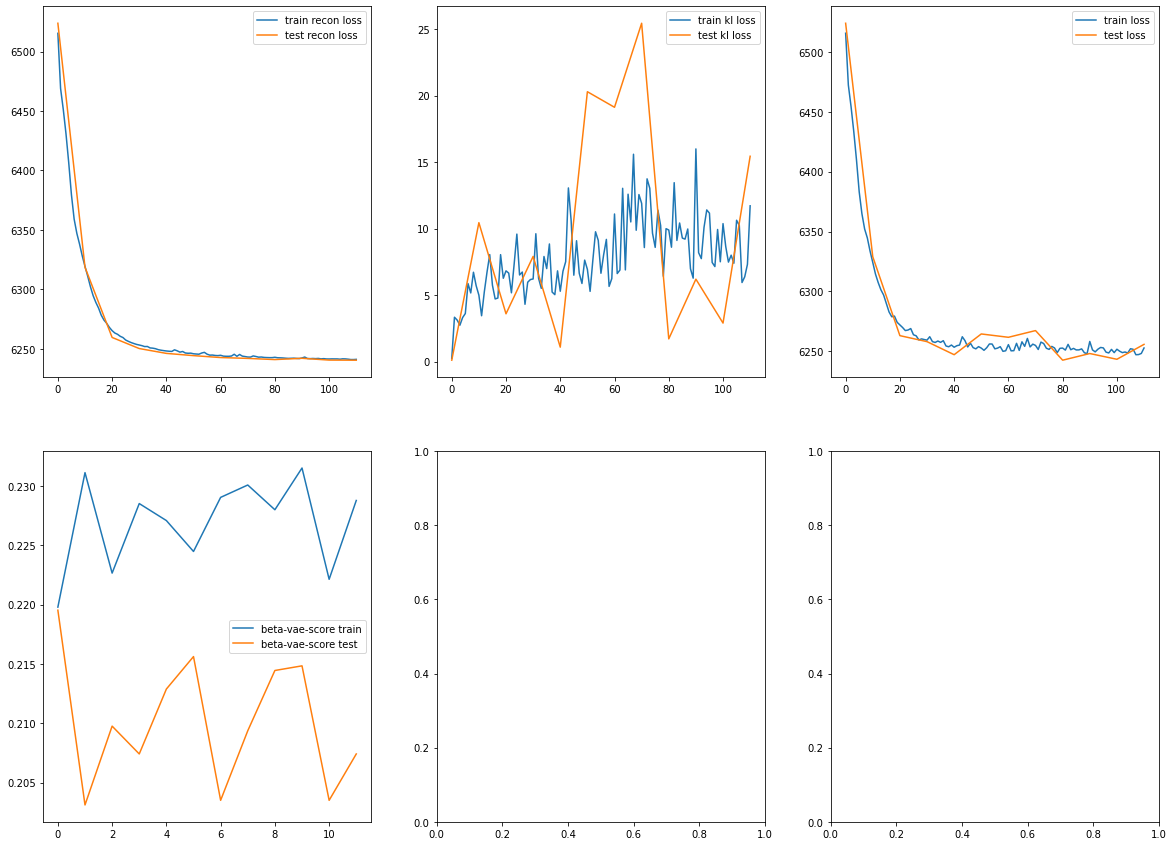

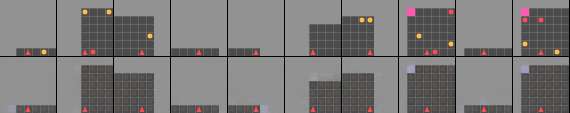

 60%|██████    | 120/200 [17:28<11:02,  8.28s/it, epoch_stat=120, kl_loss=12.8, last_save=vae_120_2021-04-07_15-13-05_6254.092.save, reconstruction_loss=6.24e+3]

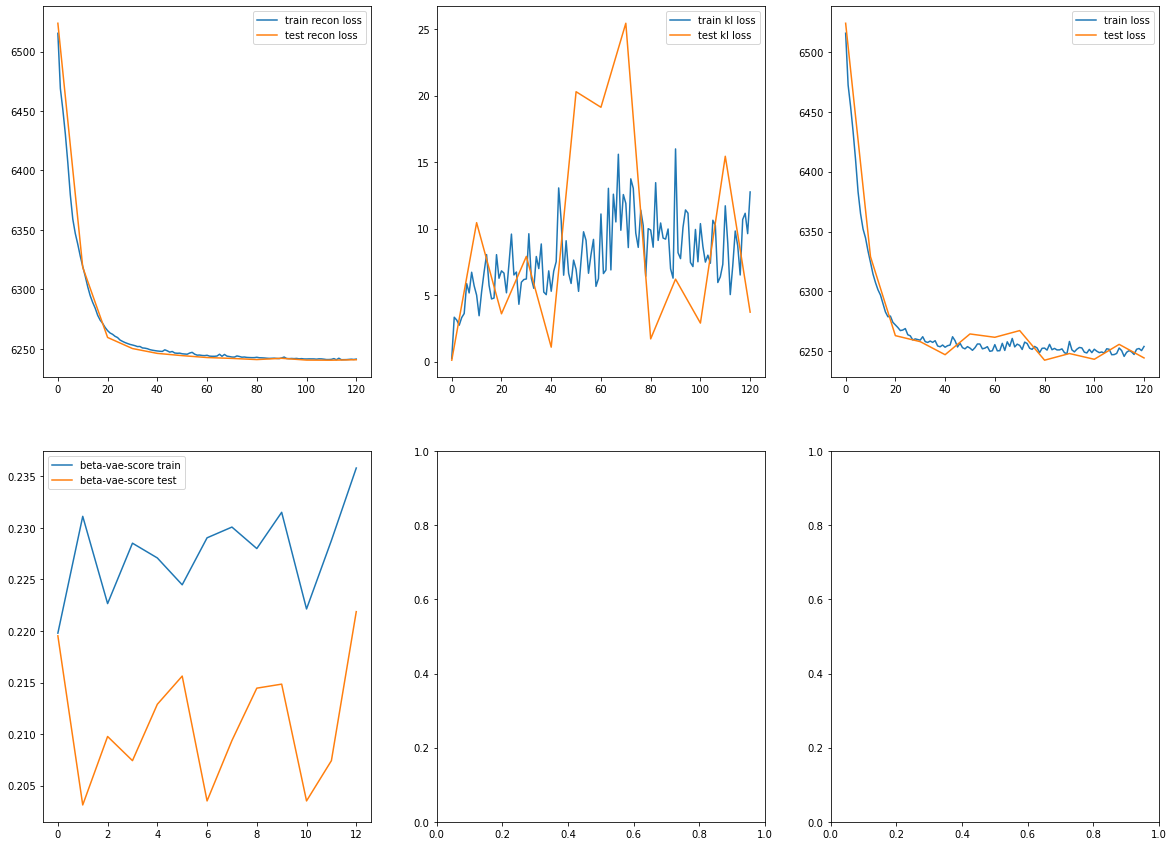

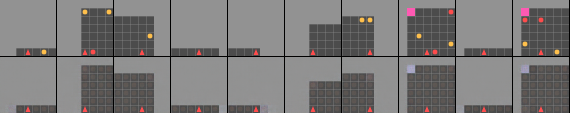

 65%|██████▌   | 130/200 [18:59<09:46,  8.38s/it, epoch_stat=130, kl_loss=8.38, last_save=vae_120_2021-04-07_15-13-05_6254.092.save, reconstruction_loss=6.24e+3]

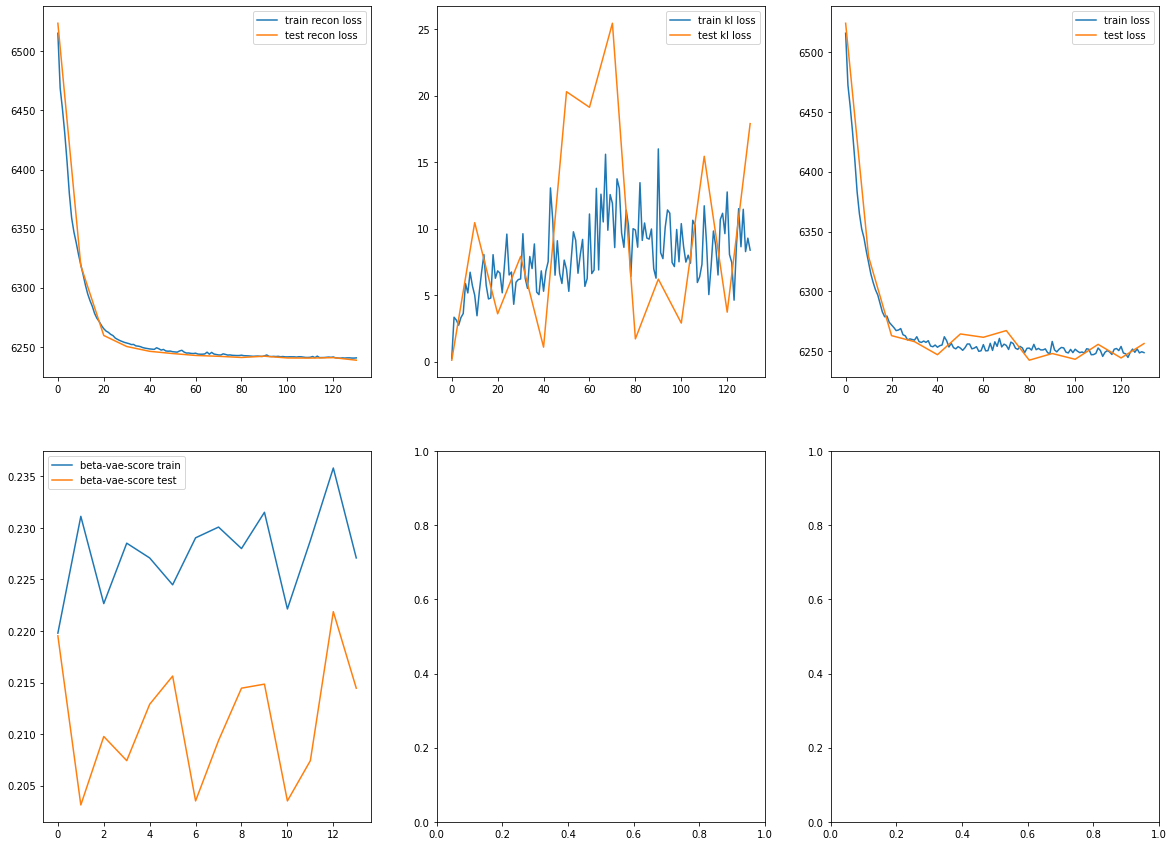

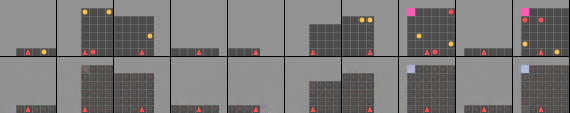

 70%|███████   | 140/200 [20:25<08:09,  8.15s/it, epoch_stat=140, kl_loss=7.45, last_save=vae_140_2021-04-07_15-16-01_6247.0503.save, reconstruction_loss=6.24e+3]

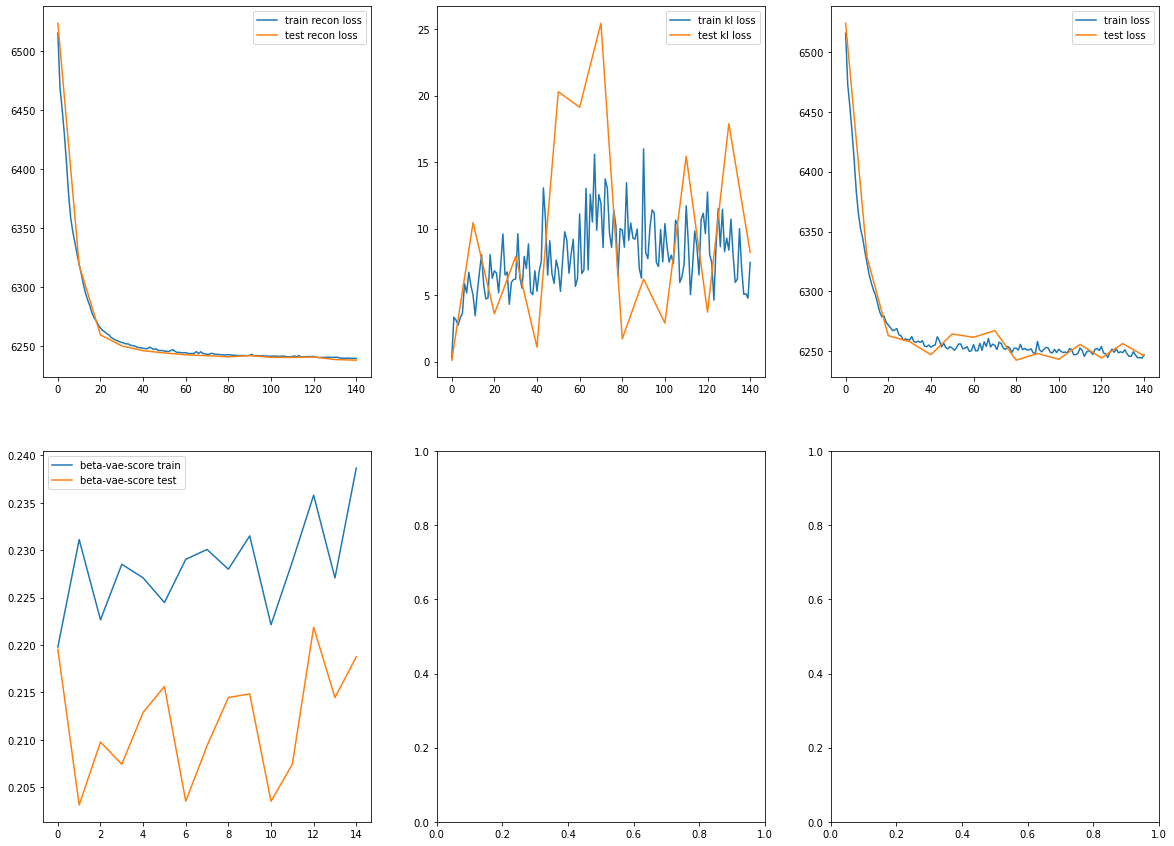

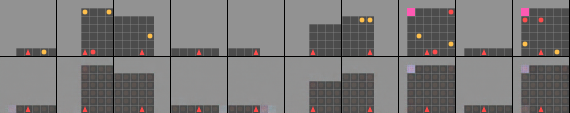

 75%|███████▌  | 150/200 [21:52<06:49,  8.20s/it, epoch_stat=150, kl_loss=5.38, last_save=vae_140_2021-04-07_15-16-01_6247.0503.save, reconstruction_loss=6.24e+3]

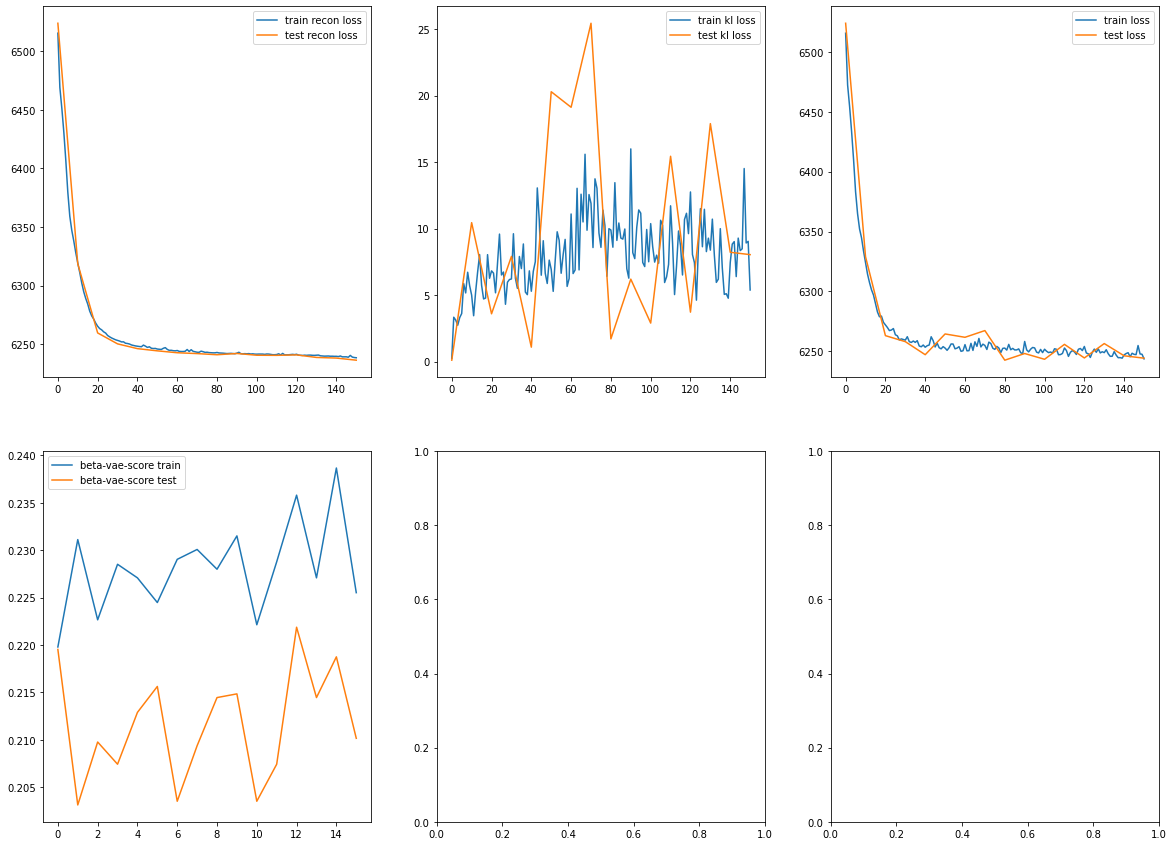

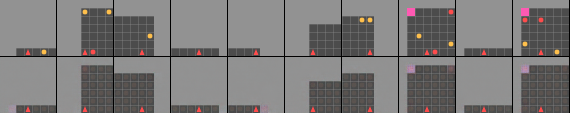

 80%|████████  | 160/200 [23:20<05:30,  8.27s/it, epoch_stat=160, kl_loss=6.84, last_save=vae_160_2021-04-07_15-18-56_6244.5034.save, reconstruction_loss=6.24e+3]

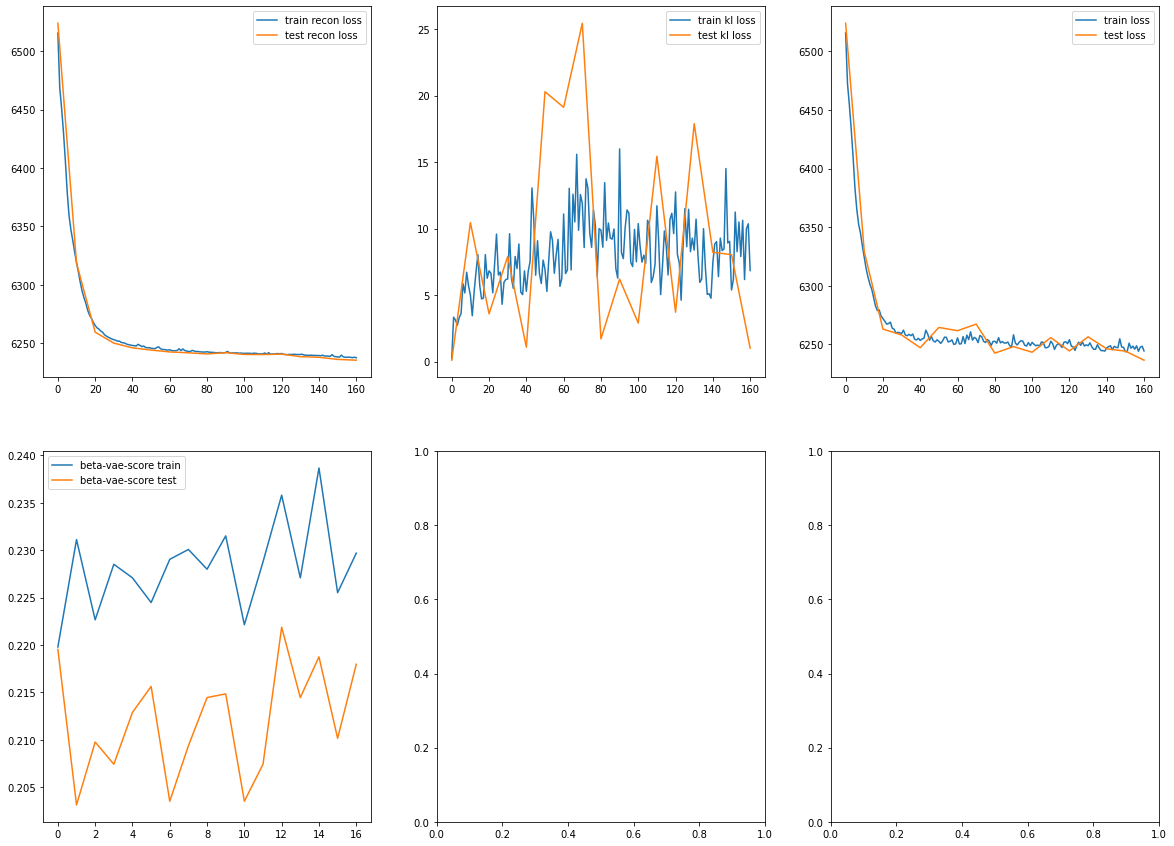

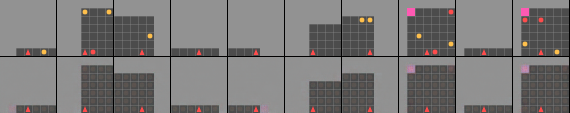

 85%|████████▌ | 170/200 [24:48<04:10,  8.34s/it, epoch_stat=170, kl_loss=8.34, last_save=vae_160_2021-04-07_15-18-56_6244.5034.save, reconstruction_loss=6.24e+3]

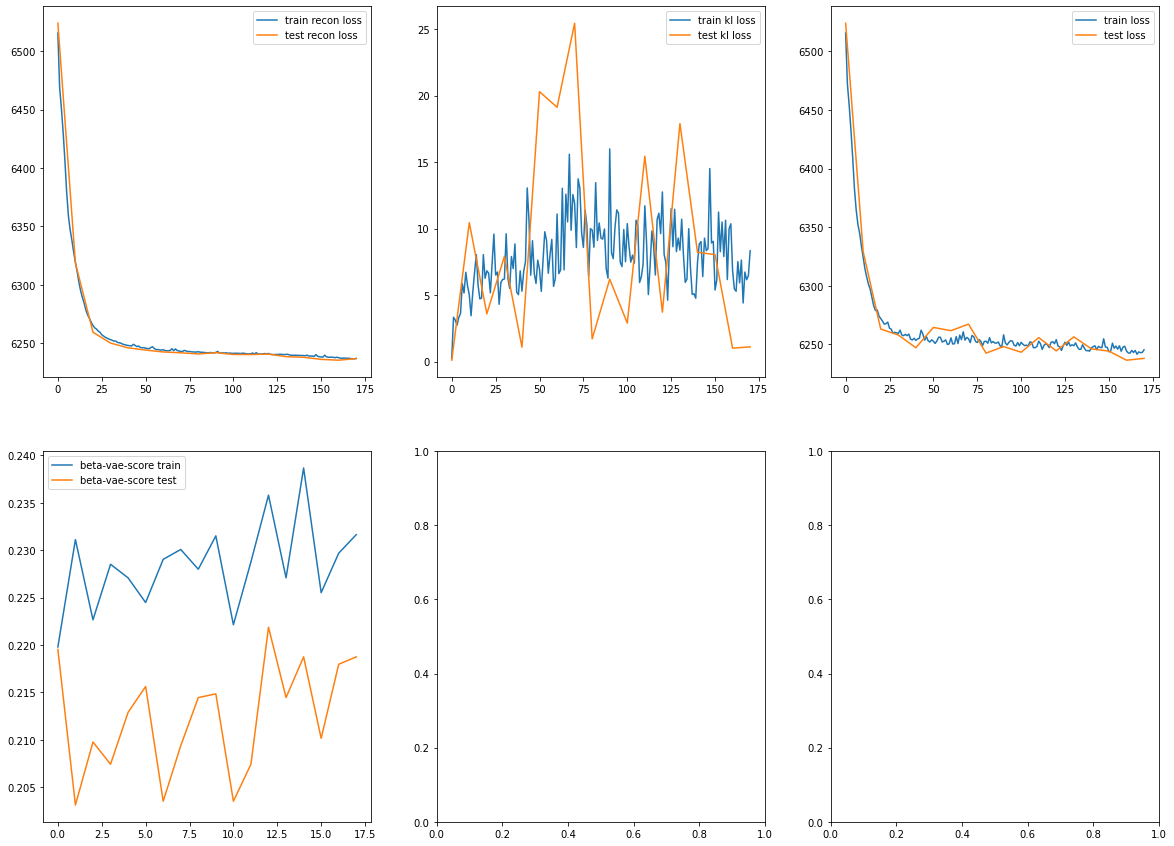

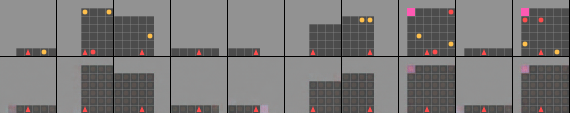

 90%|█████████ | 180/200 [26:14<02:42,  8.14s/it, epoch_stat=180, kl_loss=7.94, last_save=vae_180_2021-04-07_15-21-51_6244.1836.save, reconstruction_loss=6.24e+3]

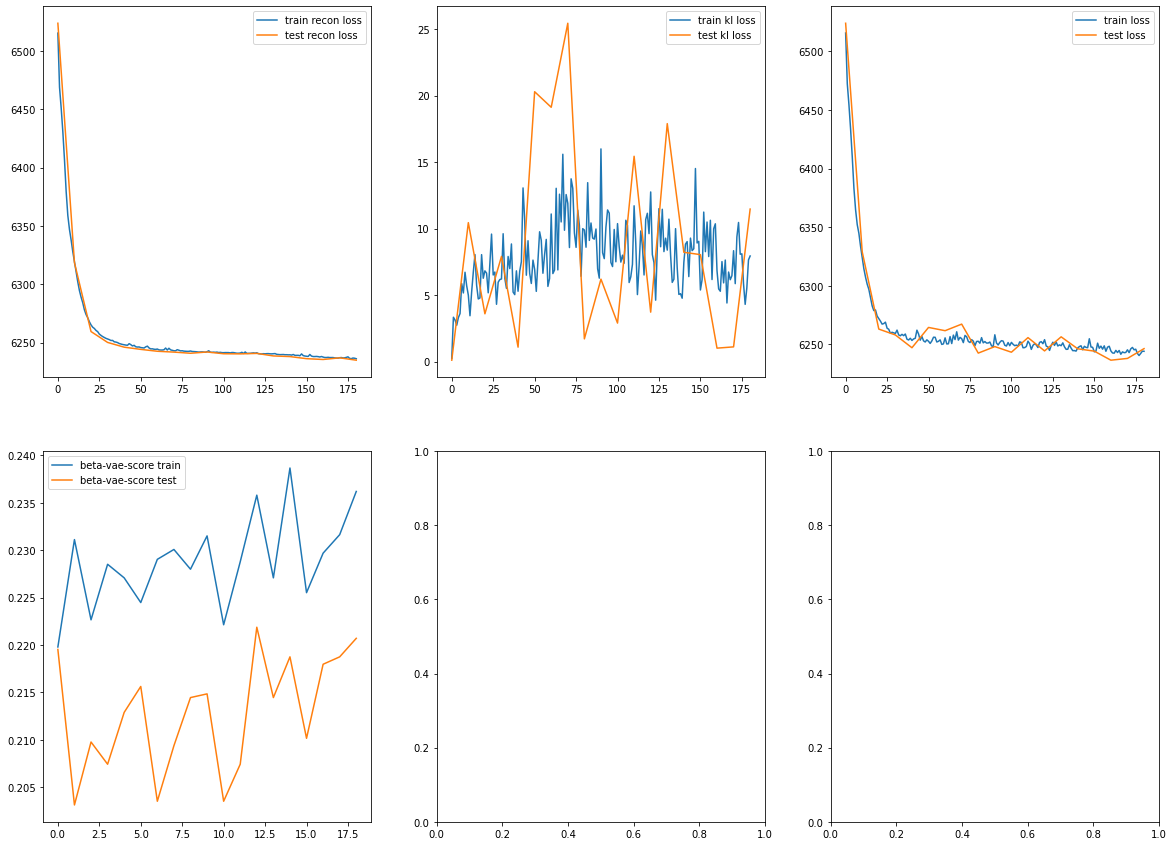

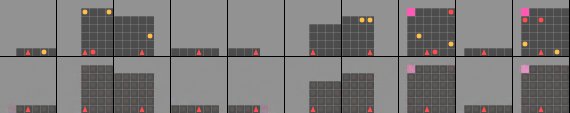

 95%|█████████▌| 190/200 [27:41<01:22,  8.24s/it, epoch_stat=190, kl_loss=5.82, last_save=vae_180_2021-04-07_15-21-51_6244.1836.save, reconstruction_loss=6.24e+3]

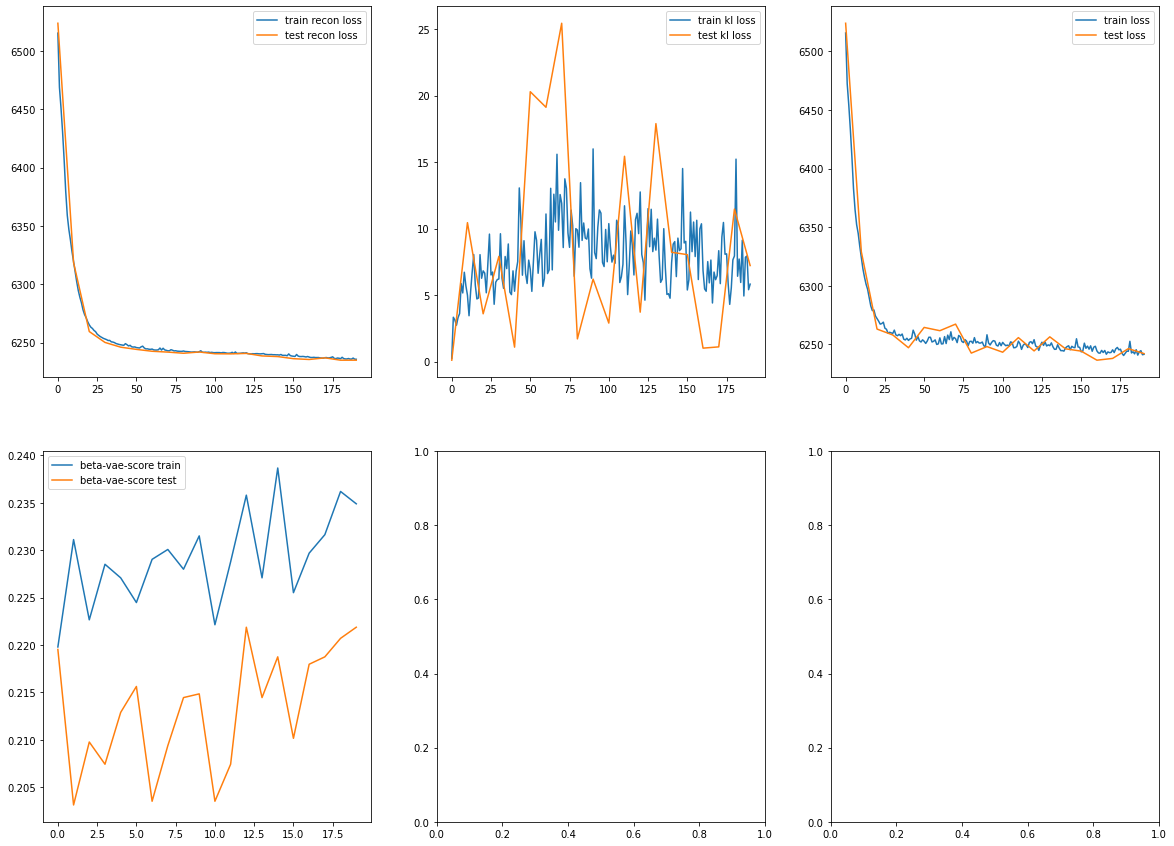

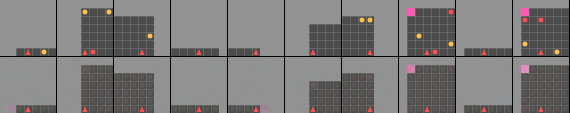

100%|██████████| 200/200 [29:03<00:00,  8.72s/it, epoch_stat=199, kl_loss=12.7, last_save=vae_180_2021-04-07_15-21-51_6244.1836.save, reconstruction_loss=6.24e+3]


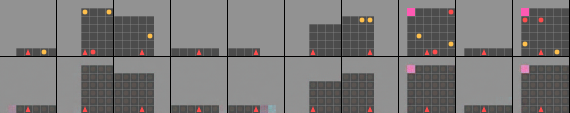

saved vae_2021-04-07_15-24-40_6248.029.save


In [7]:
vae.train(ds, epochs=200, reconstruction_callback=display_image, loss_callback=addLoss, eval_callback=addEval, batch_size=512)

In [8]:
vae.visualize_latents(ds, index=7)

'./viz/vae_2021-04-07_15-24-40.gif'